# NAME : ROSHANI CHAVAN

# PROBLEM STATEMENT:

# Predict the percentage of an student based on the no. of study hours.

 Data is taken from -  http://bit.ly/w-data

# Import the libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 

#Plots will be visible in the notebook
%matplotlib inline

In [2]:
#Import the data

df=pd.read_csv('http://bit.ly/w-data')
print('The data has been imported successfully!')
df.head()

The data has been imported successfully!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Check out the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Visualize the data to check for any relationship 

Text(0, 0.5, 'Percentage Gained')

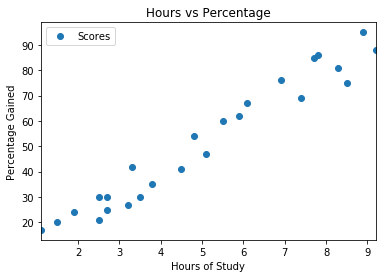

In [6]:
df.plot(x='Hours' , y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours of Study')
plt.ylabel('Percentage Gained')

# Divide the data

In [7]:
#X is our feature/attribute/input and y is our label(What we are predicting)
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

# Split the data into Training and test datasets

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# Creating the training Model

In [9]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Plot the Regression

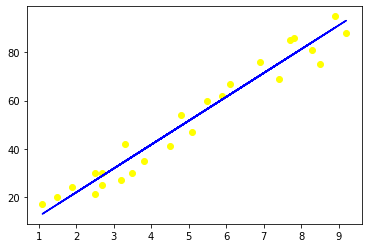

In [10]:
line = lr.coef_*X+lr.intercept_

# Plot test data
plt.scatter(X, y,color='yellow')
plt.plot(X, line,color='blue')

# Make Predictions

In [11]:
predictions = lr.predict(X_test)

In [12]:
# y_test is the actual values

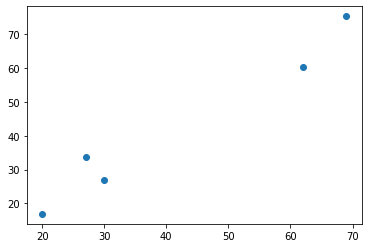

In [13]:
plt.scatter(y_test,predictions)

# Compare Actual Vs Predicted

In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions}) 

In [15]:
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Let's predicted score if a student studies for 9.25 hrs/ day

In [16]:
hrs = np.array([9.25])
hrs=hrs.reshape(1,-1)
predictions2 = lr.predict(hrs)
print("Total Hours = {}".format(hrs))
print("Predicted Score/Percentage = {} %".format(predictions2[0]))

Total Hours = [[9.25]]
Predicted Score/Percentage = 93.69173248737538 %


# Evaluate the performance of the algorithm 

In [17]:
from sklearn import metrics  

In [18]:
mae=metrics.mean_absolute_error(y_test,predictions)
mse=metrics.mean_squared_error(y_test,predictions)
rmse=np.sqrt(metrics.mean_squared_error(y_test, predictions))

In [19]:
#Displaying mean absolut error ,mean Squared error and root mean square error

In [20]:
print('Mean Absolute Error Is : ' , mae)
print('Mean Squared Error Is : ' , mse)
print('Root Mean Squared Error Is : ' , rmse)

Mean Absolute Error Is :  4.18385989900298
Mean Squared Error Is :  21.598769307217413
Root Mean Squared Error Is :  4.647447612100368
